## KNNeighbors Regression

KNNeighbors is an unsupervised machine learning algorithm that assigns an input a target value based on the target of its k-nearest neighbors.

The algorithm works by finding the k-nearest neighbors, which is the top k most similar points to the input, and assigns the target as the weighted average of the neighbors' target.

In [346]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd

In [347]:
class KNNeighborsRegression:


    def _get_k_neighors(self, X, y, point, k):

        sorted_neighbors_idxs = None

        sorted_neighbors_X, sorted_neighbors_y = None, None


        if len(X.shape) < 2:
            
            vector = np.vectorize(lambda row: np.sum((row-point)**2)**(1/2) if not np.array_equal(row, point) else float("inf"))(X)

            sorted_neighbors_idxs = np.argsort(vector)[:k]

            sorted_neighbors_X, sorted_neighbors_y = X[sorted_neighbors_idxs], y[sorted_neighbors_idxs]

        
        else:

            sorted_neighbors_idxs = np.argsort(np.apply_along_axis(lambda row: np.sum((row-point)**2)**(1/2) if not np.array_equal(row, point) else float("inf"), axis=1, arr=X))[:k]

            sorted_neighbors_X, sorted_neighbors_y = X[sorted_neighbors_idxs, :], y[sorted_neighbors_idxs, 0]

        
        return  sorted_neighbors_X, sorted_neighbors_y
    
    
    def _predict(self, point, X, y, k):

        res = 0

        total_dist = 0

        neighbors_X, neighbors_y = self._get_k_neighors(X, y, point, k)

        for n in neighbors_X:

            total_dist += np.sum((point - n)**2)**(1/2)

        for n_x, n_y in zip(neighbors_X, neighbors_y):

            n_dist = np.sum((point - n_x)**2)**(1/2)

            res += n_y*(1-(n_dist/total_dist))
        
        return res / k

    def predict(self, input, X, y, k):

        out = [self._predict(p, X, y, k) for p in input]

        return np.array(out)
        



X Shape:  (100, 2)
Y Shape:  (100, 1)


,Predictions,Actual,Input 1,Input 2
0,-0.005817,-0.045630,0.058649,-0.104279
1,0.405629,0.957570,-0.169049,1.126618
2,-0.917954,-1.858341,-1.320900,-0.537441


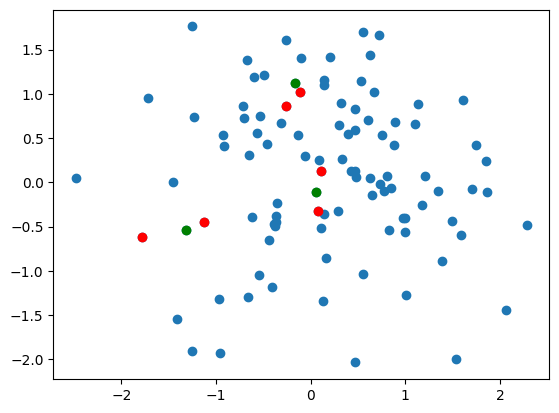

In [348]:
n = 100
num_feats = 2
k = 2
X = np.random.randn(n, num_feats)
y = np.reshape(X[:, 0] + X[:, 1], (n, 1))

input_size = 3

print("X Shape: ",X.shape)
print("Y Shape: ", y.shape)

random_idx = np.random.choice(np.arange(X.shape[0]), size=input_size)

point_X, point_y = X[random_idx, :], y[random_idx]

knn = KNNeighborsRegression()

point_neighbors_X, point_neighbors_y = [], []
for p in point_X:
    n_X, n_y = knn._get_k_neighors(X, y, p, k)
    point_neighbors_X.append(n_X)
    point_neighbors_y.append(n_y)

point_neighbors_X = np.array(point_neighbors_X)
point_neighbors_y = np.array(point_neighbors_y)


plt.scatter(X[:, 0], X[:, 1])
plt.scatter(point_X[:, 0], point_X[:, 1], c="green") #Green dots represent input
plt.scatter(point_neighbors_X[:, :, 0], point_neighbors_X[:, :, 1], c="red") # Red dots represent neighbors

preds = knn.predict(point_X, X, y, k)
pd.DataFrame({"Predictions": preds, "Actual": point_y.flatten(), "Input 1": point_X[:, 0], "Input 2": point_X[:, 1]})